# [Internet Firewall Data](https://archive.ics.uci.edu/dataset/542/internet+firewall+data)
### Classification of internet firewall data

#### Machine Learning Project 2024-2025


|   | Team  Members             |         |
|---|---------------------------|---------|
| 1 |   Ioannis Petridis        | 3210167 |
| 2 |   Iosif Christoylakis     | 3210219 |

## Introduction


The goal of this assignment is to implement and apply some of the most used machine learning algorithms to a multi-class classification task. Specifically, the assignment involves the implementation and application of the following algorithms:

1. Principal Component Analysis
2. Least Squares Classification
3. Logistic Regression
4. K Nearest Neighbors
5. Naïve Bayes
6. Multilayer Perceptron
7. Support Vector Machines
8. K-Means

Each algorithm serves a distinct purpose, ranging from dimensionality reduction (1), to classification (2-7), and clustering (8).

## Imports

In [275]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/ml-data/project')

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from IPython.display import display
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from statistics import mode
from scipy.stats import multivariate_normal

import torch
import torch.nn as nn
import torch.utils.data as data
from torch.utils.data import TensorDataset
import torch.nn.functional as F


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Context




Creating a secure firewall for internet connections involves developing rules based on behaviors that may not always be clearly identified as legitimate or malicious. To establish these rules, it is crucial to analyze various network attributes such as source and destination ports, packet sizes, and other relevant factors. By studying these behaviors, we can better understand network traffic and make informed decisions about which actions should be permitted or blocked, helping to ensure a secure network environment.

# Loading the dataset

The dataset consists of 65,532 cases.

In [276]:
# Setting the random seed for fututre use
seed = 17

# Import the data
firewall_data = pd.read_csv("firewall_data.csv")

# Display the first 5 rows of our data
firewall_data.head(5)


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [277]:
# Rename the columns
firewall_data.rename(columns={
    'Source Port': 'source_port',
    'Destination Port': 'destination_port',
    'NAT Source Port': 'nat_source_port',
    'NAT Destination Port': 'nat_destination_port',
    'Bytes': 'bytes',
    'Bytes Sent': 'bytes_sent',
    'Bytes Received': 'bytes_received',
    'Packets': 'packets',
    'Elapsed Time (sec)': 'elapsed_time',
    'pkts_sent': 'pkts_sent',
    'pkts_received': 'pkts_received',
    'Action': 'action'
}, inplace=True)


# Content


Each example has 12 features, with the 'Action' feature representing the target classes.
Here is a description of each feature in our dataset:

<table>
<thead>
<tr><th>Variable Name </th><th>Variable Description </th></tr>
</thead>

<tr><td>Source Port</td><td>Sender's initiating port.</td></tr>
<tr><td>Destination Port</td><td>Receiver's target port.</td></tr>
<tr><td>NAT Source Port</td><td>Sender's port after NAT.</td></tr>
<tr><td>NAT Destination Port</td><td>Receiver's port after NAT.</td></tr>
<tr><td>Bytes</td><td>Packet size in bytes.</td></tr>
<tr><td>Bytes Sent</td><td>Bytes sent by the sender.</td></tr>
<tr><td>Bytes Received</td><td>Bytes received by the receiver.</td></tr>
<tr><td>Packets</td><td>Total packets transmitted.</td></tr>
<tr><td>Elapsed Time (sec)</td><td>Duration of communication.</td></tr>
<tr><td>pkts_sent</td><td>Packets sent by the sender.</td></tr>
<tr><td>pkts_received</td><td>Packets received by the receiver.</td></tr>
<tr><td>Action</td><td>Class label (e.g., allow, block).</td></tr>



<tbody>
</tbody>
</table>

# Our Task


Our main task is to classify every observation to a class. Our problem consists of the following 4 classes:
* allow
* deny
* drop
* reset-both

Each record belongs only to one class

# Data preparation


In [278]:
# Split initial data into train and test (20% examples for test)
X_train, X_test, y_train, y_test = train_test_split(
    firewall_data[['source_port','destination_port','nat_source_port','nat_destination_port','bytes', 'bytes_sent', 'bytes_received', 'packets', 'elapsed_time', 'pkts_sent', 'pkts_received']],
    firewall_data['action'],
    test_size=0.2, random_state=seed
)

# Standarize our data by removing the mean and scaling to unit varience
scaler = StandardScaler()

X_train = scaler.fit_transform(np.array(X_train))
X_test = scaler.fit_transform(np.array(X_test))

y_train = np.array(y_train)
y_test = np.array(y_test)

# Convert the y values to integer classes
values = list(np.unique(firewall_data['action']))
y_convert = lambda x : values.index(x)

y_train = np.array(list(map(y_convert, y_train))).astype(int)
y_test = np.array(list(map(y_convert, y_test))).astype(int)


In [279]:
# DEBUG ONLY REMOVE LATER

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (52425, 11)
X_test shape: (13107, 11)
y_train shape: (52425,)
y_test shape: (13107,)


# Visual Representation



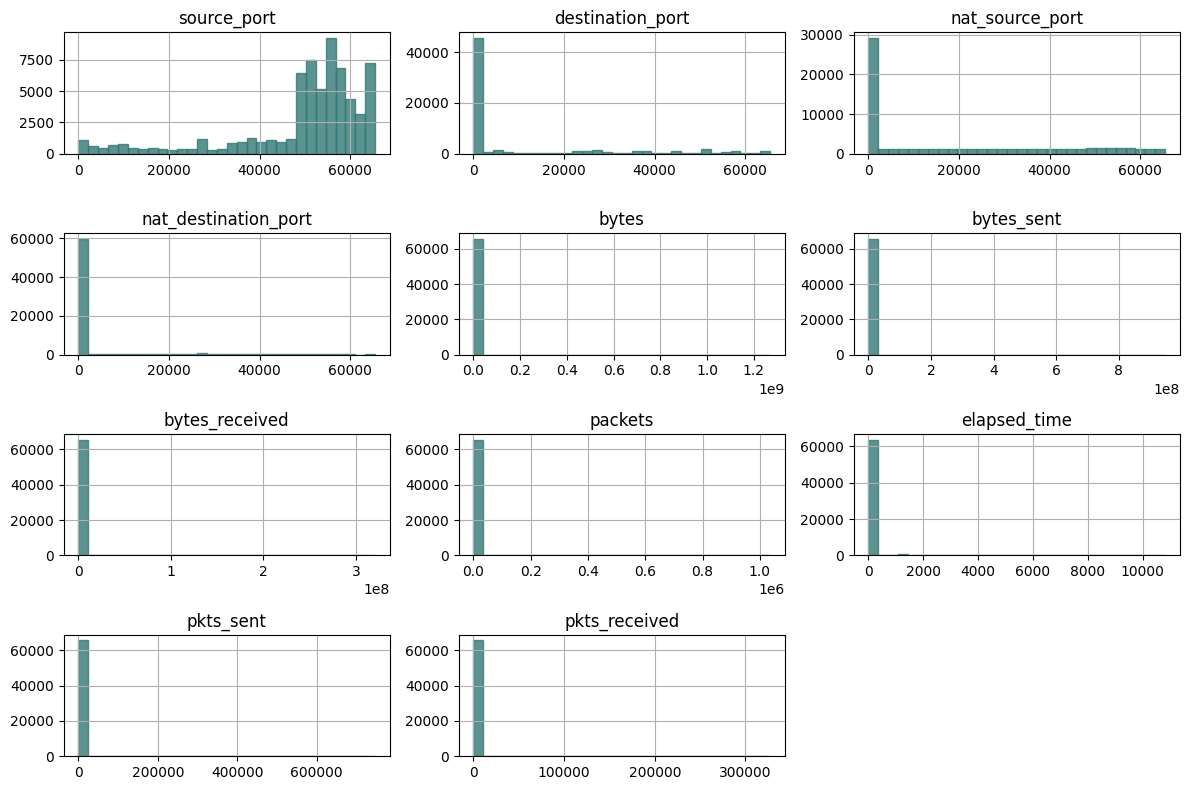

In [ ]:
# Plot the data
firewall_data.hist(figsize=(12, 8), bins=30, color="#317873", alpha=0.8, grid=True, edgecolor="#317873")
plt.tight_layout()
plt.show()


As we can see, we have many outlier values, which can be problematic when modeling our data. To address this issue, we are calculating the 95th percentile for each column and filtering the data to include only values less than or equal to this percentile.

In [280]:
numeric_columns = ['source_port','destination_port','nat_source_port','nat_destination_port','bytes', 'bytes_sent', 'bytes_received', 'packets', 'elapsed_time', 'pkts_sent', 'pkts_received']
percentile_factor = 0.95

# Calculate the 95th percentile for each numeric column
percentile = firewall_data[numeric_columns].quantile(percentile_factor)

# Filter the data: keep only values that are below or equal to the 95th percentile for each column
firewall_data = firewall_data[numeric_columns].apply(lambda x: x[x <= percentile[x.name]])

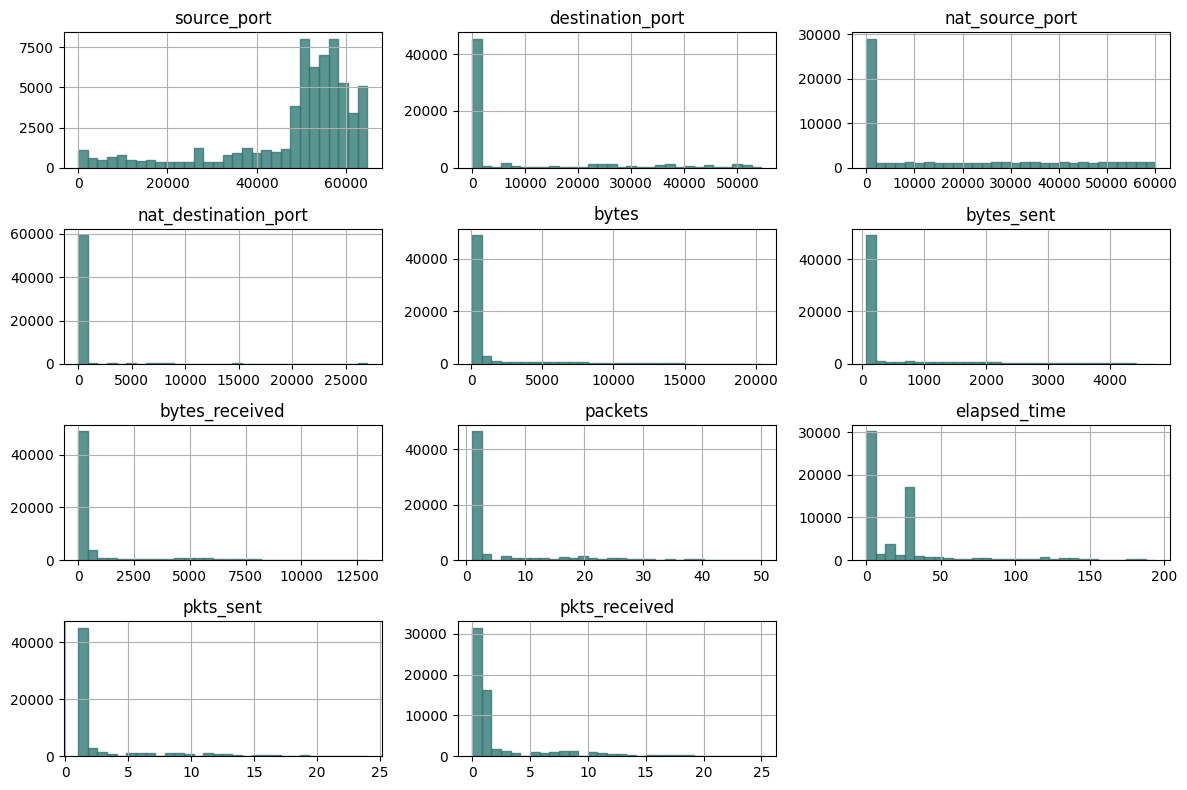

In [ ]:
# Plot the data
firewall_data.hist(figsize=(12, 8), bins=30, color="#317873", alpha=0.8, grid=True, edgecolor="#317873")
plt.tight_layout()
plt.show()


As we can see, our data is now more evenly distributed, and we're ready to move forward with creating our models.

# Principal Component Analysis


PCA occurs as follows:
1. Calculate the mean vector $\mu$ of the data
2. Normalize the data to have a zero mean:

$$\mathbf{X}_n = \mathbf{X}_n - \mu, \quad n = 1,\ldots,N$$
3. Construct the $d \times d$ covariance matrix:
$$\mathbf{S} = \frac{1}{N}\sum_{n=1}^{N} x_n x^T$$
where each $x_n$ is a column vector
    * $\mathbf{S}_{ii}$ (diagonal) is the variance of variable $i$
    * $\mathbf{S}_{ij}$ (off diagonal) is the covariance between variables $i$ and $j$
    
4. Compute the eigenvalues and eigenvectors of the covariance matrix $\mathbf{S}$
5. Keep the $k$ eigenvectors $\mathbf{U}_{:k}$ corresponding to the $k$ largest eigenvalues (principal components)
6. Find the respresentation of the data in the reduced dimension
$$ z_n = \mathbf{U}^T x_n\quad n = 1,\ldots,N$$
7. Project the inputs into the space spanned by the principal components: $\mathbf{X}_{reduced} = \mathbf{X}_{c} \mathbf{U}_{:k}$


In [ ]:
class PCA:
    def __init__(self, m):
        self.m = m

    def eigsort(self,A):
        eigvals, U = np.linalg.eig(A)
        # sort eigenvalues in descending order
        order = np.argsort(eigvals)[::-1]
        eigvals = eigvals[order]
        #re-arrange the eigenvectors
        U = U[:,order]
        return U, eigvals


    def pca_classic(self, X):
        # For each column of matrix X, compute the mean, and store it in a row vector
        mu = X.mean(axis=0).reshape( (1,-1) )

        # Subtract the mean from the matrix
        normalized_X = (X - mu)

        # Compute the covariance matrix for the matrix from the previous step
        S = (1/X.shape[0]) * normalized_X.T.dot( normalized_X)

        # Compute the eigenvectors and eigenvalues of the covariance matrix
        eigvectors, eigvals = self.eigsort( S )

        # Keep the first M columns of the eigenvectors in the matrix U
        U = eigvectors[:,:self.m]
        # Keep the first M eigenvalues in the matrix Lambdas
        Lambdas = eigvals[:self.m]
        print( X.shape, U.shape, Lambdas.shape )

        # Store the transformation Z = U * X
        # The matrix U is applied to the normalized matrix X and projects it
        # onto the eigenvectors
        Z = normalized_X.dot(U)
        return Z, U, Lambdas, mu


Methods to visualize our data.

In [ ]:
def pca_eigvecs_eigvals_report(eigvals, eigvecs, num_components, num_features):
    print("Eigenvalues:")
    eigvals_df = pd.DataFrame(eigvals, columns=[f'Eigenvalue {i + 1}' for i in range(num_components)])
    display(eigvals_df)

    print("Eigenvectors")
    eigvecs_df = pd.DataFrame(eigvecs, columns=[f'Feature {i + 1}' for i in range(num_features)])
    display(eigvecs_df)

def biplot(projection, eigvecs, labels, class_labels):
    x = projection[:, 0]
    y = projection[:, 1]
    n = eigvecs.shape[1]

    scale_x = 1 / (np.max(x) - np.min(x))
    scale_y = 1 / (np.max(y) - np.min(y))

    X_data_df = pd.DataFrame()
    X_data_df['PC1'] = x * scale_x
    X_data_df['PC2'] = y * scale_y
    X_data_df['class'] = class_labels

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.set_style("ticks")

    # Draw scatterplot
    sns.scatterplot(
        x='PC1',
        y='PC2',
        data=X_data_df,
        hue='class',
        palette=["#A1045A", "#317873", "#9867C5"],
        alpha=1,
        s=5
    )

    # Draw vectors
    for i in range(n):
        ax.arrow(0, 0, eigvecs[0, i], eigvecs[1, i],
                  color='black', alpha=0.5, label=labels[i], head_width=0.025, head_length=0.025)

        ax.text(eigvecs[0, i] * 1.1, eigvecs[1, i] * 1.1, labels[i],
                color='black', ha='center', va='center')

    plt.title('2D Biplot')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

    plt.legend()
    plt.show()

##Training & Testing

In [ ]:
# Perform PCA without dimensionality reduction at first
X_data = np.concatenate((X_train,X_test))
y_data = np.concatenate((y_train,y_test))

m = X_data.shape[1]
pca = PCA(m)
projection, eigvecs, eigvals, mu = pca.pca_classic(X_data)

(65532, 11) (11, 11) (11,)


We are now plotting the eigenvalues and eigenvectors obtained from the PCA.

<ipython-input-27-de8298991c52>:27: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


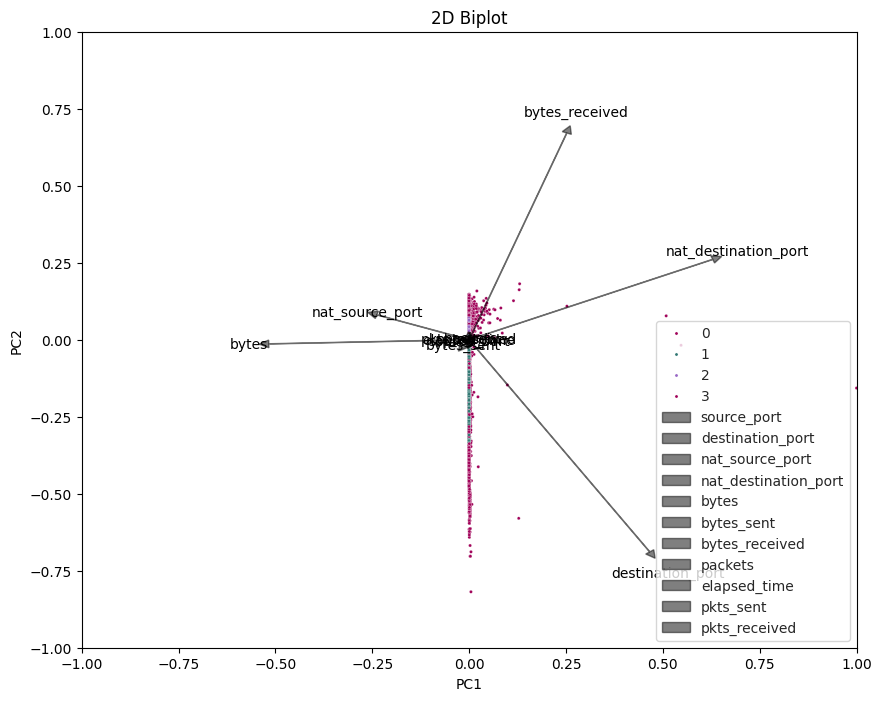

Eigenvalues:


,Eigenvalue 1,Eigenvalue 2,Eigenvalue 3,Eigenvalue 4,Eigenvalue 5,Eigenvalue 6,Eigenvalue 7,Eigenvalue 8,Eigenvalue 9,Eigenvalue 10,Eigenvalue 11
0,5.435711,1.611932,1.347527,0.872963,0.766957,0.465874,0.369887,0.07008,0.045296,0.013202,0.000572


Eigenvectors


,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11
0,-0.000384,0.466047,-0.238102,0.628540,-0.517067,-0.012879,0.251990,0.004658,-0.000218,-0.000048,-0.000100
1,-0.004685,-0.688832,0.080744,0.260705,-0.013571,-0.017155,0.671202,0.002791,-0.001665,0.000921,0.000009
2,0.011675,0.255182,-0.634963,-0.073245,0.618078,0.008853,0.379551,-0.002389,0.005754,-0.002548,0.000056
3,0.005444,-0.464941,-0.529270,0.414995,0.049499,0.002556,-0.573564,-0.003341,-0.003085,0.000150,0.000338
4,0.422481,0.001967,0.023836,0.022761,0.010935,0.105583,-0.000461,-0.489390,0.223216,-0.557781,-0.456842
5,0.393289,-0.000966,0.018421,0.021115,0.002712,0.561694,0.006285,-0.248902,0.165803,0.662065,0.034890
6,0.391561,0.011309,0.019186,0.014918,0.025707,-0.545789,-0.007030,-0.425642,-0.539422,0.194282,0.193578
7,0.426335,0.002759,0.023550,0.021805,0.017350,-0.037040,-0.005473,0.170879,0.377194,-0.292795,0.747191
8,0.082897,-0.163790,-0.500737,-0.597378,-0.588104,-0.009799,0.112584,0.006271,-0.003583,-0.003563,-0.000506
9,0.405750,0.003366,0.022383,0.023868,0.017333,0.382598,0.001132,0.507864,-0.608535,-0.218026,-0.108740


In [ ]:
biplot(projection, eigvecs, numeric_columns, y_data)
pca_eigvecs_eigvals_report(eigvals.reshape(1,m), eigvecs, num_components=m, num_features=X_train.shape[1])

### How many Principal components?

A simple way to select the number of the components in which we will represent our data is to set a threshold for  proportion of the variance that explains our reconstructed data will hold.
In typical scenarios the chosen components should explain at least 85% of the variance.

 $$ \frac{\sum_{i=1}^M \lambda_{i}} {\sum_{i=1}^N \lambda_{i}} \geq 0.85$$
85% of the variance is retained.

In [ ]:
def pca_components_number(eigvals, threshold):
    eigvals = eigvals.astype('float')
    total_var = np.sum(eigvals)
    cumul_var = 0
    for i in range(len(eigvals)):
        cumul_var += eigvals[i]
        if cumul_var >= threshold * total_var:
            return i

Below, the criterion is presented in a visual format for better understanding.

Criterion is valid when we use 5 components


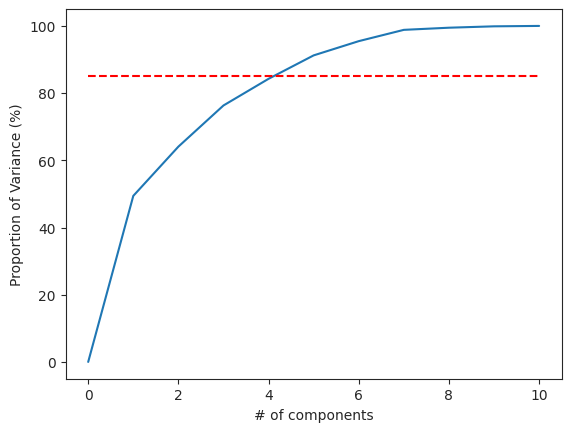

In [ ]:
# Find the first number of components that satisfies the criterion
i = pca_components_number(eigvals, 0.85) + 1
print('Criterion is valid when we use', i, 'components')

# plot the proportion of explained variance for components
x = range(X_data.shape[1])
y = [np.sum(eigvals[:m].astype('float'))/np.sum(eigvals.astype('float'))*100 for m in x]

plt.plot(x, y)
plt.plot(x,[85]*len(x), 'r--')
plt.ylabel("Proportion of Variance (%)")
plt.xlabel("# of components")
plt.show()

Since we have determined that we need to use 5 components, we will now perform PCA again with 𝑚 = 5.


In [ ]:
m = i
pca = PCA(m)
projection, eigvecs, eigvals, mu = pca.pca_classic(X_data)

(65532, 11) (11, 5) (5,)


We are now plotting the data obtained from Principal Component Analysis (PCA) using 𝑚=2, as previously determined.

<ipython-input-27-de8298991c52>:27: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


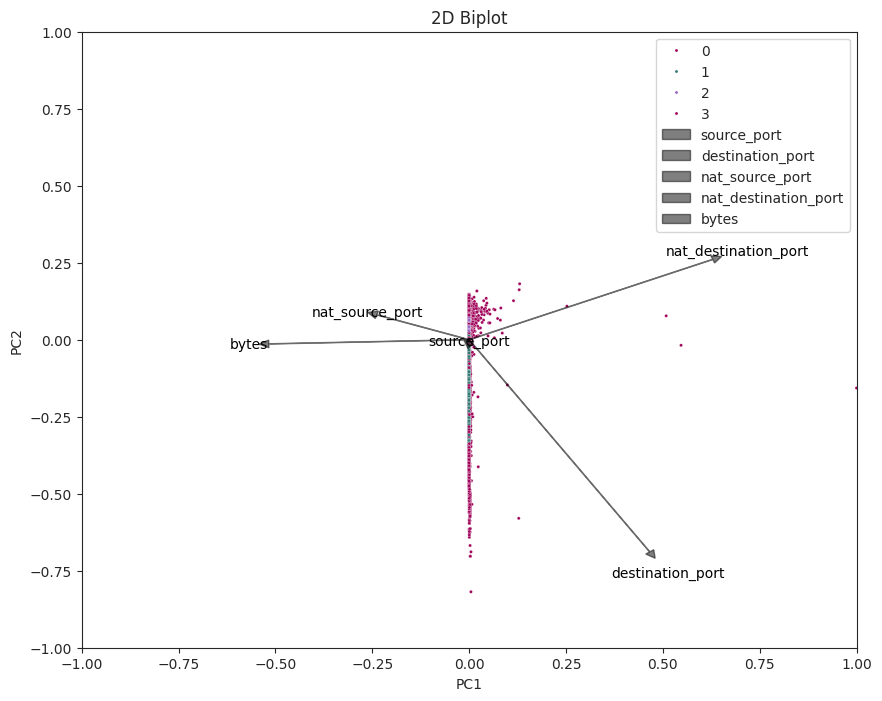

Eigenvalues:


,Eigenvalue 1,Eigenvalue 2,Eigenvalue 3,Eigenvalue 4,Eigenvalue 5
0,5.435711,1.611932,1.347527,0.872963,0.766957


Eigenvectors


,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5
0,-0.000384,0.466047,-0.238102,0.628540,-0.517067
1,-0.004685,-0.688832,0.080744,0.260705,-0.013571
2,0.011675,0.255182,-0.634963,-0.073245,0.618078
3,0.005444,-0.464941,-0.529270,0.414995,0.049499
4,0.422481,0.001967,0.023836,0.022761,0.010935
5,0.393289,-0.000966,0.018421,0.021115,0.002712
6,0.391561,0.011309,0.019186,0.014918,0.025707
7,0.426335,0.002759,0.023550,0.021805,0.017350
8,0.082897,-0.163790,-0.500737,-0.597378,-0.588104
9,0.405750,0.003366,0.022383,0.023868,0.017333


In [ ]:
biplot(projection, eigvecs, numeric_columns, y_data)
pca_eigvecs_eigvals_report(eigvals.reshape(1,m), eigvecs, num_components=m, num_features=m)

#Least Squares Classification



Least Squares Classification is a method used to classify data by minimizing the sum of squared differences between predicted and actual labels. It is typically used in regression but can be applied to classification by treating the problem as a regression task on labeled data.

## Maths

1. **Model:**  
   The model assumes a linear relationship:  
   $$ \hat{y} = W^T x + b $$  
   where:
   - $\hat{y}$ is the predicted label,
   - $W$ are the weights,
   - $x$ is the feature vector,
   - $b$ is the bias term.

2. **Loss Function:**  
   The objective is to minimize the **mean squared error (MSE):**
   $$ L(W, b) = \frac{1}{N} \sum_{i=1}^N (\hat{y}_i - y_i)^2 $$  
   where:
   - $\hat{y}_i$ is the predicted value,
   - $y_i$ is the true label,
   - $N$ is the total number of data points.

3. **Optimization:**  
   To minimize the loss, we solve for $W$ and $b$ by setting the derivative of the loss function with respect to $W$ and $b$ to zero. This results in a closed-form solution:
   $$ \mathbf{W} = (X^T X)^{-1} X^T y $$  
   where:
   - $X$ is the matrix of input features,
   - $y$ is the vector of true labels.



To implement the algorithm outlined above, during the fitting process, we first convert y_train into one-hot vectors (matrix T), and then learn the weights (matrix 𝑊) using the specified formula. The prediction is carried out exactly as described.

In [ ]:
class LeastSquaresClassification:
    def __init__(self):
        self.W = None
        self.num_classes = None

    def _one_hot_vector(self, x):
        vector = np.zeros(self.num_classes).astype(int)
        vector[x] = 1
        return vector

    def fit(self, X_train, y_train):
        self.num_classes = np.unique(y_train).shape[0]

        # Insert 1 as the first column in X to augment the input vectors with a dummy input x_0 = 1
        X = np.insert(X_train, 0, 1, axis=1)
        T = list(map(self._one_hot_vector, y_train))

        # W: W = inverse(X) * T
        self.W = np.linalg.pinv(X).dot(T)

    def predict(self, X_test):
        X = np.insert(X_test, 0, 1, axis=1)

        # Y: Y = transpose(W) * transpose(X)
        Y = self.W.T.dot(X.T)

        classes = np.argmax(Y, axis=0)

        return classes

    def accuracy(self,test, X_test, y_test):
        # Get predictions
        y_pred = self.predict(X_test)

        # Calculate accuracy: (number of correct predictions) / (total predictions)
        accuracy = np.mean(y_pred == y_test)

        print(f'{"Test" if test else "Training"} accuracy: {accuracy * 100:.2f}%')




##Training and testing

In [ ]:
# Training Least Squares Classifier
model = LeastSquaresClassification()

# Fit the model on the training data
model.fit(X_train, y_train)

# Calculate accuracy on the train data
model.accuracy(False,X_train, y_train)

# Calculate accuracy on the test data
model.accuracy(True,X_test, y_test)


Training accuracy: 91.75%
Test accuracy: 91.97%


# Logistic Regression

In this section, the Logistic Regression classification algorithm is implemented. Our model is trained using Stochastic Gradient Descent and the loss function used is the Cross-Entropy Loss.


## Maths:

1. **Loss Function (Cross-Entropy Loss):**  
   The loss for a single training example is defined as:  
   $$ L(\hat{y}, y) = - \sum_{k=1}^{K} y_k \log(\hat{y}_k) $$  
   where:
   - $ \hat{y}_k $: predicted probability for class $k$ (computed via softmax)
   - $ y_k $: the true label, represented as a one-hot encoded vector
   - $ K $: number of classes

2. **Softmax Function:**  
   The softmax function converts raw model scores (logits) into probabilities:  
   $$ \text{softmax}(\mathbf{t})_j = \frac{\exp(\mathbf{t}_j)}{\sum_{k=1}^{K} \exp(\mathbf{t}_k)} $$  
   where:
   - $ \mathbf{t} $: the vector of logits (raw outputs)
   - $ K $: total number of classes

3. **Gradient of Cross-Entropy Loss:**  
   The gradient of the loss function with respect to the model weights is:  
   $$ \frac{\partial L}{\partial \mathbf{W}_{ij}} = x_i (\hat{y}_j - y_j) $$  
   where:
   - $ x_i $: input feature
   - $ \hat{y}_j $: predicted probability for class $j$
   - $ y_j $: true label (one-hot encoded)
   
   The gradient is computed using the chain rule, combining:
   - The derivative of the loss with respect to the predicted probabilities $ \hat{y}_k $,
   - The derivative of the predicted probabilities $ \hat{y}_k $ with respect to logits,
   - The derivative of logits with respect to weights.

4. **Softmax Derivative:**  
   The derivative of the softmax function (used in the gradient calculation) is:  
   $$
   \frac{\partial \text{softmax}(\mathbf{t})_k}{\partial t_j} =
   \begin{cases}
   \text{softmax}(\mathbf{t})_k \left(1 - \text{softmax}(\mathbf{t})_k\right), & \text{if } k = j \\
   -\text{softmax}(\mathbf{t})_k \cdot \text{softmax}(\mathbf{t})_j, & \text{if } k \neq j
   \end{cases}
   $$  
   where $ \mathbf{t} $ is the vector of logits and $ \text{softmax}(\mathbf{t})_k $ is the predicted probability for class $k$.

## Weight Update Rule:
To update the weights during training, the following rule is applied:  
$$ \text{weights} = \text{weights} - \eta \times \text{gradient} $$  
where:
- $ \eta $: learning rate
- The gradient is computed as:  
  $$ \text{gradient} = \text{outer}(\text{example}, \hat{y} - y) $$

This update rule ensures that the weights move in the direction that minimizes the cross-entropy loss.


In [ ]:
class LogisticRegression():
    def __init__(self, n_iters, learning_rate):
        self.n_iters = n_iters
        self.learning_rate = learning_rate
        self.W = None

    def softmax(self,t):
        t -= np.max(t)  # Subtract the max value from t to prevent overflow
        exp_t = np.exp(t)
        return exp_t / np.sum(exp_t)

    def to_one_hot_vector(self,class_, num_classes):
        one_hot_vec = np.zeros(num_classes)
        one_hot_vec[int(class_)] = 1
        return one_hot_vec

    def cross_entropy_loss(self,y, y_hat):
        epsilon = 1e-10  # Small value to avoid log(0)
        y_hat = np.clip(y_hat, epsilon, 1 - epsilon)  # Clip values to avoid log(0)

        # Check for NaN or Inf values in y_hat and y
        if np.any(np.isnan(y_hat)) or np.any(np.isnan(y)) or np.any(np.isinf(y_hat)) or np.any(np.isinf(y)):
            print("Warning: NaN or Inf values found in inputs.")
            return np.nan  # Return NaN if there's an issue

        # Ensure y and y_hat have the same shape
        if y.shape != y_hat.shape:
            print(f"Shape mismatch: y shape {y.shape}, y_hat shape {y_hat.shape}")
            return np.nan  # Return NaN if shapes do not match

        return -np.sum(y * np.log(y_hat))

    def fit(self, X_train, y_train, X_test, y_test):
        num_examples, num_features = X_train.shape
        num_test_examples = X_test.shape[0]
        num_classes = len(np.unique(y_train))

        # insert 1 as the first column in X to augment the input vectors with a dummy input x_0 = 1
        X = np.insert(X_train, 0, 1, axis=1)
        X_test_ext = np.insert(X_test, 0, 1, axis=1)

        # insert y_train array to shuffle examples in for loop
        F = np.insert(X, 0, y_train, axis=1)

        # initialize the weights W
        self.W = np.zeros((num_features + 1, num_classes))

        train_cross_entropy_losses = list()
        test_cross_entropy_losses = list()

        for epoch in tqdm(range(1, self.n_iters+1)):

            train_loss = 0
            np.random.shuffle(F)  #random permutation of examples
            X = F[:,1:]
            y_train = F[:,0]
            for i in range(num_examples):
                example = X[i]
                logits = self.W.T.dot(example)
                probabilities = self.softmax(logits)
                one_hot_vec = self.to_one_hot_vector(y_train[i], num_classes)

                self.W = self.W - self.learning_rate * np.outer(example, probabilities - one_hot_vec)

                # Update train loss for the current example
                train_loss += self.cross_entropy_loss(one_hot_vec, probabilities)

            # Compute validation data loss for all validation examples at once
            test_loss = sum(self.cross_entropy_loss(self.to_one_hot_vector(y_test[i], num_classes), self.softmax(self.W.T.dot(X_test_ext[i]))) for i in range(len(X_test_ext)))

            # Keep track of both losses per epoch
            train_cross_entropy_losses.append(train_loss/num_examples)
            test_cross_entropy_losses.append(test_loss/num_test_examples)

        return train_cross_entropy_losses, test_cross_entropy_losses


    def predict(self, X_test):
        X = np.insert(X_test, 0, 1, axis=1)   #insert 1 in x_vector for w0

        y_pred = list()
        for example in X:
            y_pred.append(np.argmax(self.softmax(self.W.T.dot(example))))

        return np.array(y_pred)

    def accuracy(self,test, X_test, y_test):
        # Get predictions
        y_pred = self.predict(X_test)

        # Calculate accuracy: (number of correct predictions) / (total predictions)
        accuracy = np.mean(y_pred == y_test)

        print(f'{"Test" if test else "Training"} accuracy: {accuracy * 100:.2f}%')


##Training and testing

We set the learning rate to 0.01 (η = 0.01), as it yields good performance. Although the number of seasons based on observations should ideally be close to 100, an example with n = 10 is sufficient to achieve satisfactory performance for our purpose.

In [ ]:
# Training Logistic Regression Classifier
model = LogisticRegression(10, 0.01)
train_losses, test_losses = model.fit(X_train, y_train,X_test,y_test)

# Calculate accuracy on the train data
model.accuracy(False,X_train, y_train)

# Calculate accuracy on the test data
model.accuracy(True,X_test, y_test)


100%|██████████| 10/10 [01:00<00:00,  6.01s/it]


Training accuracy: 97.66%
Test accuracy: 97.54%


Finally, the evolution of the cross-entropy loss over epochs is shown. While we expect the loss to generally decrease, it may not always follow a consistent downward trend. This is due to the nature of stochastic gradient descent, where the weights are updated based on a single training example at a time. As a result, the updates may not always move directly towards the global minimum of the total cross-entropy loss, but rather towards the minimum of each individual example. Occasionally, this may cause the algorithm to take steps that appear random.

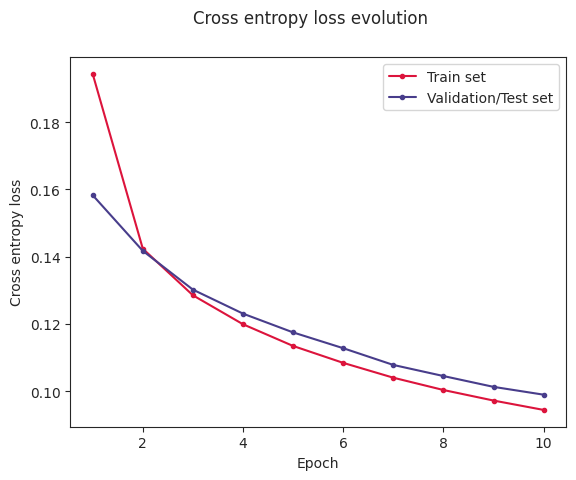

In [ ]:
plt.plot(range(1, len(train_losses)+1), train_losses, marker='.', color='crimson', label='Train set')
plt.plot(range(1, len(test_losses)+1), test_losses, marker='.', color='darkslateblue', label='Validation/Test set')
plt.suptitle('Cross entropy loss evolution')
plt.ylabel('Cross entropy loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#K Nearest Neighbors


Below, we implement the widely recognized k-Nearest Neighbors (kNN) algorithm, using Euclidean distance as the metric to measure the similarity between examples in the test set and those in the training set. Additionally, the Cross-Validation Method is provided to determine the optimal value for the hyperparameter k.This approach employs cross-validation to identify the best value for k. It computes the error for each k as the average validation error across all folds into which the training set is divided. The method returns the value of k that minimizes the overall error.






In [ ]:
class KNN:
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def sqrdist(self,x, y):
        y = np.tile(y,(x.shape[0],1))
        d = np.sqrt((np.square(x-y).sum(axis=1)))
        return d

    def predict(self, X_test):
        Ntest = X_test.shape[0]
        predicted_classes = list()

        for test_example_idx in range(Ntest):
            d = self.sqrdist(self.X_train, X_test[test_example_idx,:])

           # return the indices of the K closest instances
            k_closest = np.argsort(d)[:self.k]

            # Find the classes of the k closest instances
            y = self.y_train[k_closest]

            # mode: returns the most frequent
            predicted_classes.append(mode(y))

        return np.array(predicted_classes)


    def accuracy(self,test, X_test, y_test):
            # Get predictions
            y_pred = self.predict(X_test)

            # Calculate accuracy: (number of correct predictions) / (total predictions)
            accuracy = np.mean(y_pred == y_test)

            print(f'{"Test" if test else "Training"} accuracy: {accuracy * 100:.2f}%')

In [ ]:
def cross_validation(K, numFolds, X, y):

    N = X.shape[0]
    np.random.seed(10)
    #random permute the data before we split them
    perm = np.random.permutation(N)
    X = X[perm]
    y = y[perm]
    # The fold variable will have size numFolds + 1
    chunk_size = int(N / numFolds)
    split_indices = np.arange(chunk_size, chunk_size * numFolds, chunk_size)

    if chunk_size * numFolds < N:
        split_indices[-1] = N - 1
    else:
        last_chunk = chunk_size

    Xfolds = np.vsplit(X, split_indices)
    yfolds = np.hsplit(y, split_indices)
    valerr = np.zeros((K, numFolds))

    for k in tqdm(range(1, K + 1)):
        for j in range(numFolds):
            X_train = np.vstack([Xfolds[i] for i in range(len(Xfolds)) if i != j])
            y_train = np.hstack([yfolds[i] for i in range(len(yfolds)) if i != j])
            X_test = Xfolds[j]

            # prediction using kNN
            knn = KNN(k)
            knn.fit(X_train, y_train)
            y_test = knn.predict(X_test)

            # Compute the percent misclassified data points
            valerr[k - 1, j] = np.count_nonzero(y_test != yfolds[j]) / X_test.shape[0]
            print("kNN for k = {}, fold # {}, error = {} ".format(k, j, valerr[k - 1, j]))

    # average the validation errors
    val = valerr.sum(axis=1)/numFolds
    # select best k
    kbest = np.argmin(val)+1
    # Plot the evolution of the validation error with respect to k
    plt.plot(range(1, K+1), val*100)
    plt.ylabel('Average Validation Error %')
    plt.xlabel('K Nearest Neighbors')
    plt.show()
    print("Best k is {} with average error = {} ".format(kbest, val[kbest]))
    return kbest

##Training and testing

For the requirements of our application, we will constrain the dataset to a smaller subset to ensure that the training process can be completed within a reasonable time frame.

In [ ]:
n_reduced = 5000
X_train_reduced = X_train[:n_reduced]
y_train_reduced = y_train[:n_reduced]
X_test_reduced = X_test[:n_reduced]
y_test_reduced = y_test[:n_reduced]

  0%|          | 0/10 [00:00<?, ?it/s]

kNN for k = 1, fold # 0, error = 0.012 
kNN for k = 1, fold # 1, error = 0.008 
kNN for k = 1, fold # 2, error = 0.01 
kNN for k = 1, fold # 3, error = 0.0 
kNN for k = 1, fold # 4, error = 0.004 
kNN for k = 1, fold # 5, error = 0.01 
kNN for k = 1, fold # 6, error = 0.008 
kNN for k = 1, fold # 7, error = 0.008 
kNN for k = 1, fold # 8, error = 0.0 


 10%|█         | 1/10 [00:03<00:29,  3.33s/it]

kNN for k = 1, fold # 9, error = 0.006 
kNN for k = 2, fold # 0, error = 0.012 
kNN for k = 2, fold # 1, error = 0.008 
kNN for k = 2, fold # 2, error = 0.01 
kNN for k = 2, fold # 3, error = 0.0 
kNN for k = 2, fold # 4, error = 0.004 
kNN for k = 2, fold # 5, error = 0.01 
kNN for k = 2, fold # 6, error = 0.008 
kNN for k = 2, fold # 7, error = 0.008 
kNN for k = 2, fold # 8, error = 0.0 


 20%|██        | 2/10 [00:06<00:26,  3.35s/it]

kNN for k = 2, fold # 9, error = 0.006 
kNN for k = 3, fold # 0, error = 0.008 
kNN for k = 3, fold # 1, error = 0.006 
kNN for k = 3, fold # 2, error = 0.016 
kNN for k = 3, fold # 3, error = 0.006 
kNN for k = 3, fold # 4, error = 0.006 
kNN for k = 3, fold # 5, error = 0.008 
kNN for k = 3, fold # 6, error = 0.008 
kNN for k = 3, fold # 7, error = 0.008 
kNN for k = 3, fold # 8, error = 0.0 


 30%|███       | 3/10 [00:10<00:24,  3.52s/it]

kNN for k = 3, fold # 9, error = 0.012 
kNN for k = 4, fold # 0, error = 0.008 
kNN for k = 4, fold # 1, error = 0.008 
kNN for k = 4, fold # 2, error = 0.016 
kNN for k = 4, fold # 3, error = 0.006 
kNN for k = 4, fold # 4, error = 0.004 
kNN for k = 4, fold # 5, error = 0.008 
kNN for k = 4, fold # 6, error = 0.008 
kNN for k = 4, fold # 7, error = 0.008 
kNN for k = 4, fold # 8, error = 0.0 


 40%|████      | 4/10 [00:14<00:23,  3.84s/it]

kNN for k = 4, fold # 9, error = 0.012 
kNN for k = 5, fold # 0, error = 0.01 
kNN for k = 5, fold # 1, error = 0.012 
kNN for k = 5, fold # 2, error = 0.018 
kNN for k = 5, fold # 3, error = 0.006 
kNN for k = 5, fold # 4, error = 0.008 
kNN for k = 5, fold # 5, error = 0.014 
kNN for k = 5, fold # 6, error = 0.008 
kNN for k = 5, fold # 7, error = 0.012 
kNN for k = 5, fold # 8, error = 0.0 


 50%|█████     | 5/10 [00:18<00:18,  3.67s/it]

kNN for k = 5, fold # 9, error = 0.012 
kNN for k = 6, fold # 0, error = 0.01 
kNN for k = 6, fold # 1, error = 0.012 
kNN for k = 6, fold # 2, error = 0.018 
kNN for k = 6, fold # 3, error = 0.006 
kNN for k = 6, fold # 4, error = 0.008 
kNN for k = 6, fold # 5, error = 0.016 
kNN for k = 6, fold # 6, error = 0.008 
kNN for k = 6, fold # 7, error = 0.012 
kNN for k = 6, fold # 8, error = 0.0 


 60%|██████    | 6/10 [00:21<00:14,  3.58s/it]

kNN for k = 6, fold # 9, error = 0.012 
kNN for k = 7, fold # 0, error = 0.01 
kNN for k = 7, fold # 1, error = 0.012 
kNN for k = 7, fold # 2, error = 0.02 
kNN for k = 7, fold # 3, error = 0.006 
kNN for k = 7, fold # 4, error = 0.012 
kNN for k = 7, fold # 5, error = 0.018 
kNN for k = 7, fold # 6, error = 0.008 
kNN for k = 7, fold # 7, error = 0.014 
kNN for k = 7, fold # 8, error = 0.006 


 70%|███████   | 7/10 [00:25<00:10,  3.59s/it]

kNN for k = 7, fold # 9, error = 0.014 
kNN for k = 8, fold # 0, error = 0.01 
kNN for k = 8, fold # 1, error = 0.012 
kNN for k = 8, fold # 2, error = 0.018 
kNN for k = 8, fold # 3, error = 0.006 
kNN for k = 8, fold # 4, error = 0.012 
kNN for k = 8, fold # 5, error = 0.018 
kNN for k = 8, fold # 6, error = 0.008 
kNN for k = 8, fold # 7, error = 0.012 
kNN for k = 8, fold # 8, error = 0.006 


 80%|████████  | 8/10 [00:29<00:07,  3.85s/it]

kNN for k = 8, fold # 9, error = 0.014 
kNN for k = 9, fold # 0, error = 0.016 
kNN for k = 9, fold # 1, error = 0.014 
kNN for k = 9, fold # 2, error = 0.018 
kNN for k = 9, fold # 3, error = 0.01 
kNN for k = 9, fold # 4, error = 0.012 
kNN for k = 9, fold # 5, error = 0.02 
kNN for k = 9, fold # 6, error = 0.01 
kNN for k = 9, fold # 7, error = 0.014 
kNN for k = 9, fold # 8, error = 0.006 


 90%|█████████ | 9/10 [00:32<00:03,  3.70s/it]

kNN for k = 9, fold # 9, error = 0.014 
kNN for k = 10, fold # 0, error = 0.016 
kNN for k = 10, fold # 1, error = 0.012 
kNN for k = 10, fold # 2, error = 0.018 
kNN for k = 10, fold # 3, error = 0.01 
kNN for k = 10, fold # 4, error = 0.012 
kNN for k = 10, fold # 5, error = 0.02 
kNN for k = 10, fold # 6, error = 0.01 
kNN for k = 10, fold # 7, error = 0.014 
kNN for k = 10, fold # 8, error = 0.004 


100%|██████████| 10/10 [00:36<00:00,  3.63s/it]

kNN for k = 10, fold # 9, error = 0.014 


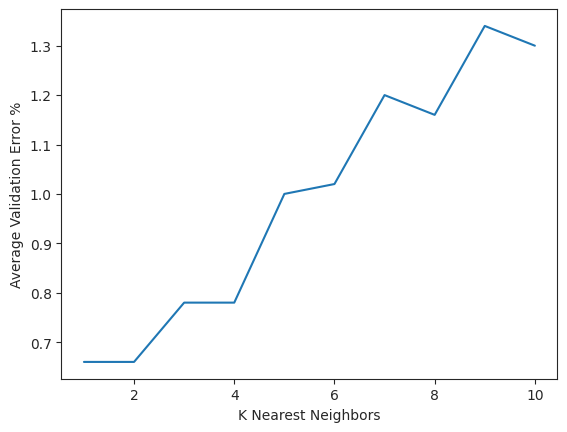

Best k is 1 with average error = 0.0066 


In [ ]:
K = 10 # Find the best k hyperparameter in range (1, K)
numFolds = 10 # Number of folds for cross validation
best_k = cross_validation(K, numFolds, X_train_reduced, y_train_reduced )

Now that we have determined that the optimal value for k in our algorithm is 1, we will retrain the model using this value of k.

In [ ]:
# Training kNN Classifier with the best k we found
model = KNN(best_k)
model.fit(X_train_reduced, y_train_reduced)

# Using kNN Classifier (train set)
model.accuracy(False,X_train_reduced, y_train_reduced)

# Using kNN Classifier (test set)
model.accuracy(True,X_test_reduced, y_test_reduced)

Training accuracy: 99.98%
Test accuracy: 99.06%


#Naïve Bayes


Consider a general case in $ \mathbb{R}^d $. We assume that the population from which our data is sampled follows a normal distribution $ \mathcal{N}(\mu, \Sigma) $. To apply Naive Bayes in $ \mathbb{R}^d $, we approximate this distribution with a second distribution $ \mathcal{N}(m, C) $, where $ C $ is a diagonal covariance matrix. This assumption implies independence among the variables, resulting in zero covariances. Consequently, the covariance matrix $ C $ has non-zero entries only on its diagonal, representing the variances $ COV(X_i, X_i) = VAR(X_i) \geq 0 $ for $ i = 1, \dots, d $.



In [ ]:
class NaiveBayes:
    def __init__(self):
        self.classes = None
        self.priors = None
        self.means = None
        self.covariances = None

    def fit(self, X_train, y_train):
        self.classes = np.unique(y_train)
        self.priors = {}
        self.means = {}
        self.covariances = {}

        for c in self.classes:
            # Separate examples per class
            class_data = X_train[y_train == c]

            # Calculate the prior probability for each class
            self.priors[c] = class_data.shape[0] / X_train.shape[0]

            # Calculate the mean vector for each class: m = [mean(f1), mean(f2),...]
            self.means[c] = np.mean(class_data, axis=0)

            # Calculate the covariance vector for each class: C = diag(var(f1), var(f2),...). Note that only the diagonal needs to be stored
            self.covariances[c] = np.var(class_data, axis=0)

            # Calculate the covariance matrix (diagonal)
            variances = np.var(class_data, axis=0)

            # Add a small value to the diagonal to ensure positive definiteness
            self.covariances[c] = np.diag(variances + 1e-6)

    def predict(self, X_test):
        predictions = list()

        for example in X_test:
            class_prob = []
            for c in self.classes:
                # P(c|example) ~ P(c) * P(example|c) = P(c) * P(example|m_c, C_c)
                class_prob.append(self.priors[c] * multivariate_normal.pdf(example, mean = self.means[c], cov=self.covariances[c]))
            predictions.append(self.classes[np.argmax(class_prob)])

        return np.array(predictions)

    def accuracy(self,test, X_test, y_test):
            # Get predictions
            y_pred = self.predict(X_test)

            # Calculate accuracy: (number of correct predictions) / (total predictions)
            accuracy = np.mean(y_pred == y_test)

            print(f'{"Test" if test else "Training"} accuracy: {accuracy * 100:.2f}%')



##Training and testing

In [ ]:
# Training Gaussian Naive Bayes Classifier
model = NaiveBayes()
model.fit(X_train, y_train)

# Using Gaussian Naive Bayes Classifier (train set)
model.accuracy(False,X_train, y_train)

# Using Gaussian Naive Bayes Classifier (test set)
model.accuracy(True,X_test, y_test)

Training accuracy: 99.12%
Test accuracy: 56.98%


The parameters (priors, means and covariance matrix) are displayed below:

In [ ]:
def naive_bayes_parameters_report(priors, means, covariance_matrix, num_classes, num_features):
    print("Priors")
    priors_df = pd.DataFrame(priors.reshape(1, -1), columns=[f'Class_{i}' for i in range(num_classes)])
    display(priors_df)

    print("Means")
    means_df = pd.DataFrame(
        means,
        columns=[f'Feature_{i}' for i in range(num_features)],
        index=[f'Class_{i}' for i in range(num_classes)]
    )
    display(means_df)

    print("Covariance Matrix per class")
    for i, covariance in enumerate(covariance_matrix):
        if covariance.shape != (num_features, num_features):
            raise ValueError(f"Covariance matrix for class {i} has incorrect shape: {covariance.shape}")
        covariance_df = pd.DataFrame(
            covariance,
            columns=[f'Feature_{j}' for j in range(num_features)],
            index=[f'Feature_{j}' for j in range(num_features)]
        )
        print(f"Class_{i} Covariance Matrix:")
        display(covariance_df)


In [ ]:
custom_priors = np.asarray(list(model.priors.values()))
custom_means = np.asarray(list(model.means.values()))
custom_num_classes = len(model.classes)

# Check if covariances need np.diag
custom_covariances = np.array([
    np.diag(model.covariances[c]) if model.covariances[c].ndim == 1 else model.covariances[c]
    for c in model.classes
])

# Display parameters
naive_bayes_parameters_report(custom_priors,custom_means,custom_covariances,custom_num_classes,X_train.shape[1])


Priors


,Class_0,Class_1,Class_2,Class_3
0,0.575527,0.228021,0.195708,0.000744


Means


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
Class_0,0.113310,-0.314766,0.648271,0.202722,0.012525,0.004706,0.023678,0.014430,0.159493,0.009442,0.020763
Class_1,-0.711937,1.262342,-0.878813,-0.274875,-0.016981,-0.006379,-0.032104,-0.019564,-0.216251,-0.012802,-0.028152
Class_2,0.502073,-0.548100,-0.880426,-0.275152,-0.016984,-0.006383,-0.032104,-0.019565,-0.216252,-0.012803,-0.028153
Class_3,-1.527514,0.784690,-0.542203,-0.195218,-0.016968,-0.006364,-0.032097,-0.019442,-0.215832,-0.012674,-0.028052


Covariance Matrix per class
Class_0 Covariance Matrix:


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
Feature_0,0.639863,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Feature_1,0.000000,0.466959,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Feature_2,0.000000,0.000000,0.745142,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Feature_3,0.000000,0.000000,0.000000,1.640595,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Feature_4,0.000000,0.000000,0.000000,0.000000,1.73717,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Feature_5,0.000000,0.000000,0.000000,0.000000,0.00000,1.737487,0.000000,0.000000,0.00000,0.000000,0.000000
Feature_6,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.736218,0.000000,0.00000,0.000000,0.000000
Feature_7,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.737049,0.00000,0.000000,0.000000
Feature_8,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.67761,0.000000,0.000000
Feature_9,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,1.737329,0.000000


Class_1 Covariance Matrix:


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
Feature_0,1.918132,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feature_1,0.000000,1.099948,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feature_2,0.000000,0.000000,0.00369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feature_3,0.000000,0.000000,0.00000,0.000232,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feature_4,0.000000,0.000000,0.00000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feature_5,0.000000,0.000000,0.00000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000
Feature_6,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000
Feature_7,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
Feature_8,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000
Feature_9,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,0.000000


Class_2 Covariance Matrix:


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
Feature_0,0.097659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feature_1,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feature_2,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feature_3,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feature_4,0.000000,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feature_5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000
Feature_6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000
Feature_7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
Feature_8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000
Feature_9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,0.000000


Class_3 Covariance Matrix:


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
Feature_0,1.644945,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feature_1,0.000000,1.096238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feature_2,0.000000,0.000000,0.559869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feature_3,0.000000,0.000000,0.000000,0.021299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feature_4,0.000000,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feature_5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000
Feature_6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000
Feature_7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
Feature_8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,0.000000
Feature_9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,0.000000


#Multilayer Perceptron


In this section, we'll develop a Multilayer Perceptron using the PyTorch framework. This neural network will feature several linear layers interspersed with non-linear activation functions. Our model will comprise an input layer, several hidden linear layers, and an output layer, all utilizing the ReLU activation function.


In [ ]:
gpu_avail = torch.cuda.is_available()
print(f"Using GPU? {gpu_avail}")
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

Using GPU? False


Define the MLP model we will be using.

In [165]:
class MlpModel(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs, num_layers=1):
        super().__init__()
        self.layers = [nn.Linear(num_inputs, num_hidden)]

        for i in range(num_layers):
            self.layers.append(nn.ReLU())
            out_features = num_outputs if i == (num_layers - 1) else num_hidden
            self.layers.append(nn.Linear(num_hidden, out_features=out_features))

        self.model = nn.Sequential(*self.layers)

    def forward(self, x):
        return self.model(x)

Define the MLPCustomClassifier, incorporating the train_model and eval_model methods. During the evaluation phase, manually apply the softmax function to the output of the model's last hidden layer as previously mentioned.

In [258]:
class Mlp:
    def __init__(self, model, optimizer, loss_module, num_epochs=100, n_epochs_unchanged=5):
        self.model = model
        self.optimizer = optimizer
        self.loss_module = loss_module
        self.num_epochs = num_epochs
        self.n_epochs_unchanged = n_epochs_unchanged

    def train_model(self, data_loader, test_loader):
        # Set model to train mode
        self.model.train()

        train_cross_entropy_losses = []
        test_cross_entropy_losses = []

        # Training loop
        for epoch in tqdm(range(self.num_epochs)):
            train_loss = 0

            for data_inputs, data_labels in data_loader:
                # Convert one-hot encoded labels to class indices if needed
                if data_labels.ndim > 1:
                    data_labels = torch.argmax(data_labels, dim=1)

                # Run the model on the input data
                preds = self.model(data_inputs)

                # Calculate the loss
                loss = self.loss_module(preds, data_labels)
                train_loss += loss.item()

                # Perform backpropagation
                self.optimizer.zero_grad()
                loss.backward()

                # Update the parameters
                self.optimizer.step()

            # Keep track of both losses per epoch
            train_cross_entropy_losses.append(train_loss / len(data_loader))
            test_loss, _ = self.eval_model(test_loader)
            test_cross_entropy_losses.append(test_loss)

        return train_cross_entropy_losses, test_cross_entropy_losses

    def eval_model(self, data_loader):
        # Set model to eval mode
        self.model.eval()

        total_loss = 0
        pred_labels = []

        with torch.no_grad():  # Deactivate gradients for the following code
            for data_inputs, data_labels in data_loader:
                # Convert one-hot encoded labels to class indices if needed
                if data_labels.ndim > 1:
                    data_labels = torch.argmax(data_labels, dim=1)

                # Determine prediction of model
                data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
                preds = self.model(data_inputs)

                # Calculate the total cross entropy loss
                loss = self.loss_module(preds, data_labels)
                total_loss += loss.item()

                # Convert predictions to class labels
                pred_labels.append(torch.argmax(preds, dim=1).cpu().numpy())

        return total_loss / len(data_loader), pred_labels

    def accuracy(self,test, data_loader):
        self.model.eval()
        correct_predictions = 0
        total_predictions = 0

        with torch.no_grad():  # Deactivate gradients for the following code
            for data_inputs, data_labels in data_loader:
                data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)

                # Get predictions
                preds = self.model(data_inputs)

                # Convert predictions to class labels
                preds = torch.argmax(preds, dim=1)

                # Ensure that data_labels are in the correct shape
                if data_labels.ndim > 1:
                    data_labels = torch.argmax(data_labels, dim=1)

                # Update correct predictions and total predictions
                correct_predictions += (preds == data_labels).sum().item()
                total_predictions += data_labels.size(0)

        # Calculate accuracy: (number of correct predictions) / (total predictions)
        accuracy = correct_predictions / total_predictions

        print(f'{"Test" if test else "Training"} accuracy: {accuracy * 100:.2f}%')



##Data preparation

For the requirements of our application, we will constrain the dataset to a smaller subset to ensure that the training process can be completed within a reasonable time frame.

In [260]:
n_reduced = 10000
X_train_reduced = X_train[:n_reduced]
y_train_reduced = y_train[:n_reduced]
X_test_reduced = X_test[:n_reduced]
y_test_reduced = y_test[:n_reduced]

To prepare the training data, we will transform the datasets from numpy arrays into PyTorch tensors.

In [261]:
# Train data
X_train_tensor = torch.tensor(X_train_reduced, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_reduced)
y_train_tensor = y_train_tensor.long()
y_train_tensor = F.one_hot(y_train_tensor, num_classes=y_train_reduced.shape[0])
# Create a TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Test/Validation data
X_test_tensor = torch.tensor(X_test_reduced, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_reduced)
y_test_tensor = y_test_tensor.long()
y_test_tensor = F.one_hot(y_test_tensor, num_classes=y_test_reduced.shape[0])
# Create a TensorDataset
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

To begin, we establish the parameters for our MLP as follows:

- **Loss Function:** CrossEntropyLoss

- **Model:** An instance of the previously defined MlpModel class. Detailed characteristics of this instance (input layer size, the number and size of hidden layers, and output layer size) are outlined below.

- **Optimizer:** Stochastic Gradient Descent (SGD) with a specified learning rate and mini-batch processing.

In [262]:
# Define the parameters for the MlpCustomClassifier
loss_module = nn.CrossEntropyLoss()
mlp_model = MlpModel(num_inputs=X_train_reduced.shape[1], num_hidden=10, num_outputs=len(np.unique(y_train_reduced)), num_layers=2)
optimizer = torch.optim.SGD(mlp_model.parameters(), lr=0.01)

# Display the model
print(mlp_model)

MlpModel(
  (model): Sequential(
    (0): Linear(in_features=11, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
  )
)


Next, we'll train the MLP and track the cross-entropy loss as it changes over time. We expect the loss to generally decrease, but it won't always go down steadily. This happens because we're using stochastic gradient descent, which updates the weights based on a small batch of examples each time. So, the steps taken don't always point directly to the lowest cross-entropy loss.

##Training and testing

In [263]:
# Model instantiation and training
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_data_loader = data.DataLoader(test_dataset, batch_size=1, shuffle=False, drop_last=False)

model = Mlp(mlp_model, optimizer, loss_module)
train_losses, test_losses = model.train_model(train_data_loader, test_data_loader)

100%|██████████| 100/100 [06:54<00:00,  4.14s/it]


Display the cross entropy loss evolution.

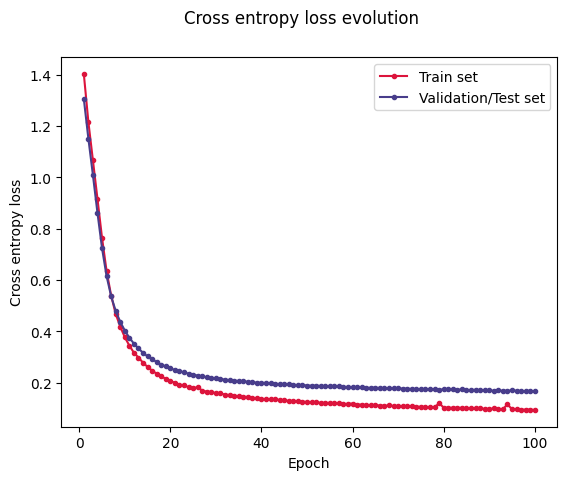

In [264]:
plt.plot(range(1, len(train_losses)+1), train_losses, marker='.', color='crimson', label='Train set')
plt.plot(range(1, len(test_losses)+1), test_losses, marker='.', color='darkslateblue', label='Validation/Test set')
plt.suptitle('Cross entropy loss evolution')
plt.ylabel('Cross entropy loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

The values of the accuracy, precision, recall and f1-score metrics are presented for the train set:

In [266]:
# Using kMeans Clustering (train set)
model.accuracy(False,train_data_loader)

# Using kMeans Clustering (test set)
model.accuracy(True,test_data_loader)

Training accuracy: 98.16%
Test accuracy: 96.48%


#Support Vector Machines


##SVM Algorithm Initialization:

Initialize weight vector $\mathbf{w}$ and bias $b$ to zero.

Training:

For each example $(x_i, y_i)$:

Compute $f(x_i) = \mathbf{w} \cdot x_i - b$.

If $y_i f(x_i) \geq 1$: $$ \mathbf{w} \leftarrow \mathbf{w} - \eta (2 \lambda \mathbf{w}) $$

  Else: $$ \mathbf{w} \leftarrow \mathbf{w} - \eta (2 \lambda \mathbf{w} - y_i x_i) $$ $$ b \leftarrow b - \eta y_i $$

  Prediction:

For a new point $x$, predict: $$ \hat{y} = \text{sign}(\mathbf{w} \cdot x - b) $$

Cost Function: $$ J(\mathbf{w}, b) = \lambda \|\mathbf{w}\|^2 + \frac{1}{N} \sum_{i=1}^N \max(0, 1 - y_i (\mathbf{w} \cdot x_i - b)) $$

## OvRSVM Algorithm Initialization:

For each class $k \in \{0, 1, 2, 3\}$, initialize an SVM classifier with $\mathbf{w_k}$ and $b_k$.
Training:

For each class $k$, create binary labels $y_i^k$: $$ y_i^k = \begin{cases} 1 & \text{if } y_i = k \\ -1 & \text{otherwise} \end{cases} $$

Train the SVM for class $k$ using $y_i^k$.

Prediction:

For a new point $x$, compute $f_k(x) = \mathbf{w_k} \cdot x - b_k$ for each class $k$.

Predict the class with the highest $f_k(x)$: $$ \hat{y} = \arg\max_{k} f_k(x) $$

Cost Function for OvRSVM: $$ J_k(\mathbf{w_k}, b_k) = \lambda \|\mathbf{w_k}\|^2 + \frac{1}{N} \sum_{i=1}^N \max(0, 1 - y_i^k (\mathbf{w_k} \cdot x_i - b_k)) $$

In [318]:
class OvRSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.models = []
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters

    def fit(self, X, y, n_classes):
        self.models = []
        for i in range(n_classes):
            y_binary = np.where(y == i, 1, -1)
            model = SVM(learning_rate=self.learning_rate, lambda_param=self.lambda_param, n_iters=self.n_iters)
            model.fit(X, y_binary)
            self.models.append(model)

    def predict(self, X):
        predictions = [model.predict(X) for model in self.models]
        scores = np.vstack(predictions).T
        return np.argmax(scores, axis=1)

    def accuracy(self,test, X_test, y_test):
            # Get predictions
            y_pred = self.predict(X_test)

            # Calculate accuracy: (number of correct predictions) / (total predictions)
            accuracy = np.mean(y_pred == y_test)

            print(f'{"Test" if test else "Training"} accuracy: {accuracy * 100:.2f}%')

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return approx

### Training & Testing

For the requirements of our application, we will constrain the dataset to a smaller subset to ensure that the training process can be completed within a reasonable time frame.

In [324]:
n_reduced = 100
X_train_reduced = X_train[:n_reduced]
y_train_reduced = y_train[:n_reduced]
X_test_reduced = X_test[:n_reduced]
y_test_reduced = y_test[:n_reduced]


In [325]:
# Initialize and train the OvRSVM on full-dimensional data
model = OvRSVM(learning_rate=0.001, lambda_param=0.01, n_iters=100)
model.fit(X_train_reduced , y_train_reduced , n_classes=y_train_reduced.shape[0])

# Using OvRSVM (train set)
model.accuracy(False,X_train_reduced, y_train_reduced)

# Using OvRSVM Clustering (test set)
model.accuracy(True,X_test_reduced, y_test_reduced)

Training accuracy: 86.00%
Test accuracy: 80.00%


#K-Means

Given data $\mathbf{x} = \{x_1, x_2,\ldots,x_n\}$ where each $x_n \in \mathbb{R}^D$ we want to group these datapoints in $K$ clusters ($K \ll N$), where each cluster is represented by a mean vector $\mu_k \in \mathbb{R}^D$.

Our purpose is to find a way to divide the data in clusters, finding appropriate values for the means $\mu_k, k=1,\ldots,K$


### Kmeans Algorithm steps
<ol>

  <li>Choose k random points of data as centroids</li>

  <li>Expectation Step: From $ n =1 $ to $N$, assign each data instance in the cluster with the closest center $\mu_k$</li>
    
  <br>
  <li>Maximazation Step: Calculate the new cluster centers $$\mu_k = \frac{\sum_{n=1}^N r_{nk} \, x_n }{\sum_{n=1}^N r_{nk}}$$
  <br>
  $$ r_{nk} \in \{0,1\}, \, \sum_{k=1}^K r_{nk}=1$$

  so when $x_n$ belongs to cluster $k$, then $r_{nk}=1$ and $r_{nj}=0$ for each $j \neq k$.
  </li>
  <br>
  <li>Check for convergence and stop, otherwise go to step 2</li>
</ol>





The cost function
$$ J(r_1,\ldots,r_N, \mu_1,\ldots,\mu_K)= \sum_{n=1}^N \sum_{k=1}^K r_{nk} \lVert \mathbf{x}_n - \mathbf{\mu}_k \rVert ^2$$

In [298]:
class kMeans:
  def __init__(self, k, max_iters):
      self.k = k
      self.max_iters = max_iters
      self.centroids = None


  def distance(self,X,y):
      y = np.tile(y, (X.shape[0], 1))

      # Calculate the squared Euclidean distance between each row of x and y
      squared_distance = np.square(X - y).sum(axis=1)

      return squared_distance

  def cost_function(self,X, c, labels):
      return 0.5*sum(self.distance(X[i].reshape((1,X[i].shape[0])), c[labels[i]]) for i in range(X.shape[0]))

  def fit(self, X):
      # Choose k random points of data as centroids
      indices = np.random.choice(X.shape[0], self.k, replace=False)
      self.centroids = X[indices]

      costs = list()

      for _ in tqdm(range(self.max_iters)):
          # Expectation step
          labels = self.predict(X)  # Assign each data point to the nearest centroid
          costs.append(self.cost_function(X, self.centroids, labels).item()) # Calculate the cost

          # Maximization step
          new_centroids = np.array([np.mean(X[labels == label], axis=0) for label in range(self.k)])
          costs.append(self.cost_function(X, new_centroids, labels).item()) # Calculate the new cost

          # If the algorithm has converged, then stop
          if np.all(self.centroids == new_centroids):
              break

          self.centroids = new_centroids

      iters = len(costs)//2
      return costs, iters

  def predict(self, X):
      # Assign each data point to the nearest centroid
      distances = np.array([self.distance(self.centroids, x) for x in X])
      labels = np.argmin(distances, axis=1)

      return labels

  def accuracy(self,test, X_test, y_test):
          # Get predictions
          y_pred = self.predict(X_test)

          # Calculate accuracy: (number of correct predictions) / (total predictions)
          accuracy = np.mean(y_pred == y_test)

          print(f'{"Test" if test else "Training"} accuracy: {accuracy * 100:.2f}%')

### Training & Testing

For the requirements of our application, we will constrain the dataset to a smaller subset to ensure that the training process can be completed within a reasonable time frame.

In [301]:
n_reduced = 2000
X_train_reduced = X_train[:n_reduced]
y_train_reduced = y_train[:n_reduced]
X_test_reduced = X_test[:n_reduced]
y_test_reduced = y_test[:n_reduced]

In [300]:
num_of_classes = len(np.unique(y_train_reduced))
max_iters = 100

# Training k-means
model = kMeans(num_of_classes, max_iters)
costs, iters = model.fit(X_train_reduced)

# Results
print("Results: ")
print("Iterations run: ", iters)
print("Final Cost: ", costs[-1])

# Using kMeans Clustering (train set)
model.accuracy(False,X_train_reduced, y_train_reduced)

# Using kMeans Clustering (test set)
model.accuracy(True,X_test_reduced, y_test_reduced)


 13%|█▎        | 13/100 [00:01<00:07, 12.03it/s]


KeyboardInterrupt: 